<p><font size="6"><b>Xarray intro</b></font></p>


> *DS Python for GIS and Geoscience*  
> *October, 2021*
>
> *© 2021, Joris Van den Bossche and Stijn Van Hoey. Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [52]:
import matplotlib.pyplot as plt

## Introduction

In [59]:
import xarray as xr

Let's start with reading the Sentinel RGB bands for Herstappe again:

In [61]:
herstappe_file = "./data/herstappe/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff"
herstappe = xr.open_rasterio(herstappe_file)

In [62]:
herstappe

<xarray.DataArray (band: 3, y: 227, x: 447)>
[304407 values with dtype=float32]
Coordinates:
  * band     (band) int64 1 2 3
  * y        (y) float64 6.578e+06 6.577e+06 6.577e+06 ... 6.569e+06 6.568e+06
  * x        (x) float64 5.935e+05 5.935e+05 5.936e+05 ... 6.113e+05 6.114e+05
Attributes:
    transform:               (40.07813983073409, 0.0, 593476.1968631798, 0.0,...
    crs:                     +init=epsg:3857
    res:                     (40.07813983073409, 40.1126034998577)
    is_tiled:                0
    nodatavals:              (nan, nan, nan)
    scales:                  (1.0, 1.0, 1.0)
    offsets:                 (0.0, 0.0, 0.0)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

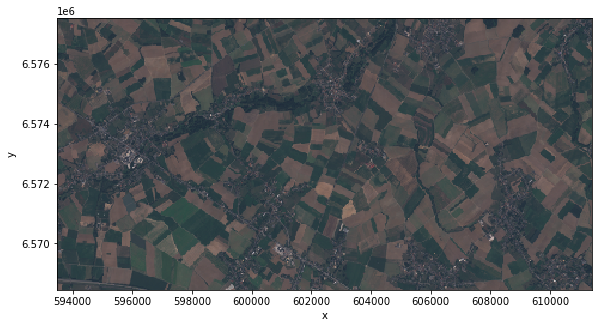

In [69]:
ax = herstappe.plot.imshow(figsize=(12, 5))
ax.axes.set_aspect('equal')

We can further make the dimension information more useful by renaming the labels of the 'band' dimension:

In [64]:
herstappe = herstappe.assign_coords(band=("band", ["red", "green", "blue"]))
herstappe

<xarray.DataArray (band: 3, y: 227, x: 447)>
[304407 values with dtype=float32]
Coordinates:
  * band     (band) <U5 'red' 'green' 'blue'
  * y        (y) float64 6.578e+06 6.577e+06 6.577e+06 ... 6.569e+06 6.568e+06
  * x        (x) float64 5.935e+05 5.935e+05 5.936e+05 ... 6.113e+05 6.114e+05
Attributes:
    transform:               (40.07813983073409, 0.0, 593476.1968631798, 0.0,...
    crs:                     +init=epsg:3857
    res:                     (40.07813983073409, 40.1126034998577)
    is_tiled:                0
    nodatavals:              (nan, nan, nan)
    scales:                  (1.0, 1.0, 1.0)
    offsets:                 (0.0, 0.0, 0.0)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

Or just rename the coordinate names itself:

In [66]:
herstappe.rename({"x": "longitude", "y": "latitude"})

<xarray.DataArray (band: 3, latitude: 227, longitude: 447)>
[304407 values with dtype=float32]
Coordinates:
  * band       (band) <U5 'red' 'green' 'blue'
  * latitude   (latitude) float64 6.578e+06 6.577e+06 ... 6.569e+06 6.568e+06
  * longitude  (longitude) float64 5.935e+05 5.935e+05 ... 6.113e+05 6.114e+05
Attributes:
    transform:               (40.07813983073409, 0.0, 593476.1968631798, 0.0,...
    crs:                     +init=epsg:3857
    res:                     (40.07813983073409, 40.1126034998577)
    is_tiled:                0
    nodatavals:              (nan, nan, nan)
    scales:                  (1.0, 1.0, 1.0)
    offsets:                 (0.0, 0.0, 0.0)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

These __name dimensions__ can be used to extract (slice) data using these names making data selections very declarative:

In [68]:
herstappe.sel(band='red')

<xarray.DataArray (y: 227, x: 447)>
[101469 values with dtype=float32]
Coordinates:
    band     <U5 'red'
  * y        (y) float64 6.578e+06 6.577e+06 6.577e+06 ... 6.569e+06 6.568e+06
  * x        (x) float64 5.935e+05 5.935e+05 5.936e+05 ... 6.113e+05 6.114e+05
Attributes:
    transform:               (40.07813983073409, 0.0, 593476.1968631798, 0.0,...
    crs:                     +init=epsg:3857
    res:                     (40.07813983073409, 40.1126034998577)
    is_tiled:                0
    nodatavals:              (nan, nan, nan)
    scales:                  (1.0, 1.0, 1.0)
    offsets:                 (0.0, 0.0, 0.0)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

Using xarray:

- Data stored as a Numpy arrays
- Dimensions do have a name
- The coordinates of each of the dimensions can represent geographical coordinates, categories, dates, ... instead of just an index

<div class="alert alert-info" style="font-size:120%">

**REMEMBER**: <br>

The [`xarray` package](xarray.pydata.org/en/stable/) introduces __labels__ in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays. Xarray is inspired by and borrows heavily from Pandas.    

</div>

## Selecting data

Xarray’s labels make working with multidimensional data much easier:

In [70]:
herstappe = xr.open_rasterio(data_file)
herstappe = herstappe.assign_coords(band=("band", ["red", "green", "blue"]))

We could use the Numpy style of data slicing:

In [71]:
herstappe[0]

<xarray.DataArray (y: 227, x: 447)>
[101469 values with dtype=float32]
Coordinates:
    band     <U5 'red'
  * y        (y) float64 6.578e+06 6.577e+06 6.577e+06 ... 6.569e+06 6.568e+06
  * x        (x) float64 5.935e+05 5.935e+05 5.936e+05 ... 6.113e+05 6.114e+05
Attributes:
    transform:               (40.07813983073409, 0.0, 593476.1968631798, 0.0,...
    crs:                     +init=epsg:3857
    res:                     (40.07813983073409, 40.1126034998577)
    is_tiled:                0
    nodatavals:              (nan, nan, nan)
    scales:                  (1.0, 1.0, 1.0)
    offsets:                 (0.0, 0.0, 0.0)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

However, it is often much more powerful to use xarray’s `.sel()` method to use label-based indexing, making the selection more declarative:

In [72]:
herstappe.sel(band="red")

<xarray.DataArray (y: 227, x: 447)>
[101469 values with dtype=float32]
Coordinates:
    band     <U5 'red'
  * y        (y) float64 6.578e+06 6.577e+06 6.577e+06 ... 6.569e+06 6.568e+06
  * x        (x) float64 5.935e+05 5.935e+05 5.936e+05 ... 6.113e+05 6.114e+05
Attributes:
    transform:               (40.07813983073409, 0.0, 593476.1968631798, 0.0,...
    crs:                     +init=epsg:3857
    res:                     (40.07813983073409, 40.1126034998577)
    is_tiled:                0
    nodatavals:              (nan, nan, nan)
    scales:                  (1.0, 1.0, 1.0)
    offsets:                 (0.0, 0.0, 0.0)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

We can select a specific set of coordinate values as a __list__ and take the value that is most near to the given value:

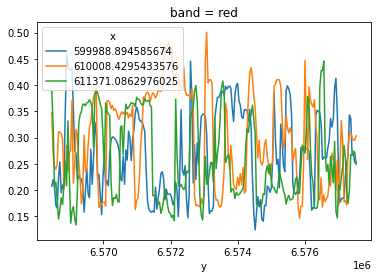

In [75]:
herstappe.sel(x=[600_000, 610_000, 620_000], method="nearest").sel(band="red").plot.line(hue="x");

Sometimes, a specific range is required. The `.sel()` method also supports __slicing__, so we can select the green band and slice a subset of the data along the x direction:

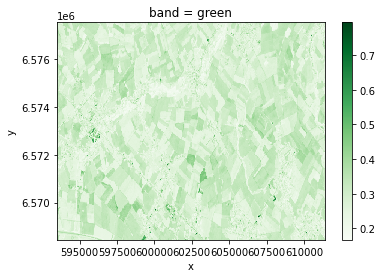

In [76]:
herstappe.sel(x=slice(580_000, 620_000), band="green").plot.imshow(cmap="Greens")

The __positional indexing__ as you would do with the underlying Numpy array is still possible as well:

In [77]:
herstappe[0, 100:200:10, 100:200:10]

<xarray.DataArray (y: 10, x: 10)>
array([[0.35   , 0.1795 , 0.18425, 0.28175, 0.168  , 0.30175, 0.40075,
        0.3285 , 0.24075, 0.32025],
       [0.361  , 0.1615 , 0.1495 , 0.35125, 0.2855 , 0.182  , 0.16325,
        0.19125, 0.16225, 0.17125],
       [0.4145 , 0.40825, 0.1885 , 0.1665 , 0.17575, 0.21025, 0.2005 ,
        0.37025, 0.16375, 0.41225],
       [0.22225, 0.41   , 0.318  , 0.1625 , 0.336  , 0.33325, 0.1925 ,
        0.2195 , 0.17925, 0.24175],
       [0.1955 , 0.263  , 0.216  , 0.3695 , 0.21975, 0.26475, 0.178  ,
        0.2425 , 0.27425, 0.37175],
       [0.1805 , 0.40075, 0.17625, 0.16225, 0.414  , 0.1695 , 0.15875,
        0.19075, 0.20575, 0.24225],
       [0.205  , 0.1875 , 0.1635 , 0.3485 , 0.21375, 0.23775, 0.32575,
        0.17825, 0.332  , 0.18325],
       [0.21775, 0.16275, 0.177  , 0.16475, 0.44825, 0.44575, 0.221  ,
        0.1505 , 0.3005 , 0.18625],
       [0.2065 , 0.22525, 0.15925, 0.16425, 0.16   , 0.31875, 0.30975,
        0.26425, 0.15025, 0.289  ],
       [0.203  , 0.1985 , 0.44625, 0.50825, 0.36   , 0.3295 , 0.21725,
        0.156  , 0.344  , 0.18875]], dtype=float32)
Coordinates:
    band     <U5 'red'
  * y        (y) float64 6.574e+06 6.573e+06 6.573e+06 ... 6.57e+06 6.57e+06
  * x        (x) float64 5.975e+05 5.979e+05 5.983e+05 ... 6.007e+05 6.011e+05
Attributes:
    transform:               (40.07813983073409, 0.0, 593476.1968631798, 0.0,...
    crs:                     +init=epsg:3857
    res:                     (40.07813983073409, 40.1126034998577)
    is_tiled:                0
    nodatavals:              (nan, nan, nan)
    scales:                  (1.0, 1.0, 1.0)
    offsets:                 (0.0, 0.0, 0.0)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

Use a __condition__ to select data, also called fancy indexing or boolean indexing:

In [78]:
herstappe > 0.2

<xarray.DataArray (band: 3, y: 227, x: 447)>
array([[[ True,  True, False, ..., False, False,  True],
        [ True,  True,  True, ..., False,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])
Coordinates:
  * band     (band) <U5 'red' 'green' 'blue'
  * y        (y) float64 6.578e+06 6.577e+06 6.577e+06 ... 6.569e+06 6.568e+06
  * x        (x) float64 5.935e+05 5.935e+05 5.936e+05 ... 6.113e+05 6.114e+05

However, with xarray we cannot use a mask like this to directly filter the array or assign new values. 

One typical use case for raster data is where you want to apply a mask to the data and set those values to some "NODATA" value. For plotting, this can for example be `np.nan`, and for this we can use the `where()` method:

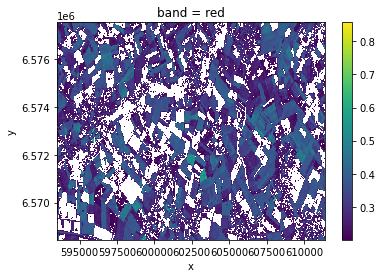

In [ ]:
herstappe.where(herstappe > 0.2).sel(band="red").plot.imshow()

## Let's practice!

We'll again look at some Sentinel GeoTiff data, this time from the region of the City of Ghent:

<div class="alert alert-success">

**EXERCISE**:

* Read in the file `./data/gent/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff` with xarray and assign the data to a new variable `tc_data`.  
* Inspect the display of `tc_data`. What are the different dimensions of the array? 
* Select only the *second* layer of `tc_data` and assign the output to a new variable `tc_g`.
* Plot the second (green) layer.
* Create a new array with each of the elements in the `tc_g` array with a value above 15000 set to a new value of 65535.
    
<details><summary>Hints</summary>

* To select a specific subset for a certain dimension of a DataArray, use the `.sel()` method. The argument name to use is the name of the dimension.
* You can mask an array and set the masked values to another value with the `.where()` method. Check the help of the method for information on the keyword arguments.

</details>
    
</div>

In [92]:
tc_data = xr.open_rasterio("./data/gent/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff")

In [93]:
tc_data

<xarray.DataArray (band: 3, y: 317, x: 625)>
[594375 values with dtype=uint16]
Coordinates:
  * band     (band) int64 1 2 3
  * y        (y) float64 6.639e+06 6.639e+06 6.639e+06 ... 6.621e+06 6.621e+06
  * x        (x) float64 3.925e+05 3.926e+05 3.926e+05 ... 4.282e+05 4.283e+05
Attributes:
    transform:               (57.32777121388223, 0.0, 392465.9217302375, 0.0,...
    crs:                     +init=epsg:3857
    res:                     (57.32777121388223, 57.44833434997156)
    is_tiled:                0
    nodatavals:              (nan, nan, nan)
    scales:                  (1.0, 1.0, 1.0)
    offsets:                 (0.0, 0.0, 0.0)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

In [94]:
# Get the green channel
tc_g = tc_data.sel(band=2)
tc_g

<xarray.DataArray (y: 317, x: 625)>
[198125 values with dtype=uint16]
Coordinates:
    band     int64 2
  * y        (y) float64 6.639e+06 6.639e+06 6.639e+06 ... 6.621e+06 6.621e+06
  * x        (x) float64 3.925e+05 3.926e+05 3.926e+05 ... 4.282e+05 4.283e+05
Attributes:
    transform:               (57.32777121388223, 0.0, 392465.9217302375, 0.0,...
    crs:                     +init=epsg:3857
    res:                     (57.32777121388223, 57.44833434997156)
    is_tiled:                0
    nodatavals:              (nan, nan, nan)
    scales:                  (1.0, 1.0, 1.0)
    offsets:                 (0.0, 0.0, 0.0)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

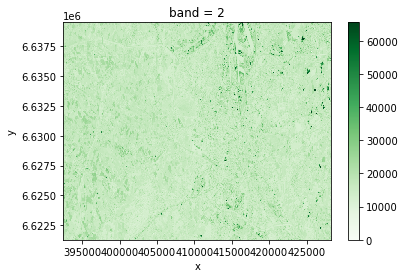

In [95]:
# Plot the green channel
tc_g.plot.imshow(cmap="Greens")

In [96]:
# Convert all values above 15000
tc_g.where(tc_g < 15000, 65535)

<xarray.DataArray (y: 317, x: 625)>
array([[65535, 65535, 65535, ..., 65535, 65535, 65535],
       [65535, 65535, 65535, ..., 65535, 14221, 13779],
       [65535, 65535, 65535, ..., 14631, 65535, 65535],
       ...,
       [65535, 65535, 65535, ..., 65535, 65535, 65535],
       [65535, 65535, 65535, ..., 14516, 65535, 65535],
       [65535, 65535, 65535, ..., 13844, 65535, 65535]], dtype=uint16)
Coordinates:
    band     int64 2
  * y        (y) float64 6.639e+06 6.639e+06 6.639e+06 ... 6.621e+06 6.621e+06
  * x        (x) float64 3.925e+05 3.926e+05 3.926e+05 ... 4.282e+05 4.283e+05
Attributes:
    transform:               (57.32777121388223, 0.0, 392465.9217302375, 0.0,...
    crs:                     +init=epsg:3857
    res:                     (57.32777121388223, 57.44833434997156)
    is_tiled:                0
    nodatavals:              (nan, nan, nan)
    scales:                  (1.0, 1.0, 1.0)
    offsets:                 (0.0, 0.0, 0.0)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

<div class="alert alert-success">

**EXERCISE**:

Subsample the ndarray `tc_data` by taking only the one out of each 5 data points for all layers at the same time. Use _positional indexing_ to subsample the data.
    
(Be aware that this is a naive resampling implementation for educational purposes only). 
    
<details><summary>Hints</summary>

* Slicing in Numpy is similar to Python lists, but in multiple dimensions, e.g. for 2 dimensions `my_array[start:end:step-size, start:end:step-size]`.
* When selecting all elements in a given dimension, just use a single colon, e.g. `my_array[:]`. When slicing from `start` to `end` of an array, leave these values empty, e.g. `my_array[::step-size]`.
* The result should still be a 3-D array with 3 elements in the first dimension.

</details>   
    
</div>

In [37]:
tc_data = xr.open_rasterio("./data/gent/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff")

In [38]:
# subsample the data
tc_data[:, ::5, ::5].shape

(3, 64, 125)

<div class="alert alert-success">

**EXERCISE**:

Elements with the value `65535` do represent 'Not a Number' (NaN) values. However, Numpy does not support NaN values for integer data, so we'll convert to float first as data type. After reading in the data set `./data/gent/raster/2020-09-17_Sentinel_2_L1C_B04.tiff` (assign data to variable `b4_data`):
    
* Count the number of elements that are equal to `65535`
* Convert the data type to `float`, assign the result to  a new variable `b4_data_f`
* Assign Nan (`np.nan`) value to each of the elements of `b4_data_f` equal to `65535`
* Count the number of Nan values in the `b4_data_f` data
* Make a histogram of both the `b4_data` and `b4_data_f` data. Can you spot the difference?
    
<details><summary>Hints</summary>

* `np.nan` represents _Not a Number (NaN)_ in Numpy. You can mask an array with np.nan values using the `where()`method
* `np.sum` will by default sum all of the elements of the input array and can also count boolean values (True = 1 and False = 0), resulting from a conditional expression. 
* To test if a value is a nan, Numpy provides `np.isnan(...)` which results in an element-wise check returning boolean values.
* Check the help of the `plt.hist` command to find out more about the `bins` and the `log` arguments.

</details>
    
   
</div>

In [97]:
b4_data = xr.open_rasterio("./data/gent/raster/2020-09-17_Sentinel_2_L1C_B04.tiff")

In [98]:
# Count the number of cells with value 65535
np.sum(b4_data == 65535)

<xarray.DataArray ()>
array(30)

In [99]:
# Convert to float and make 65535 equal to Nan
b4_data_f = b4_data.astype(float)
b4_data_f = b4_data_f.where(b4_data != 65535)

In [100]:
# Count the number of cells with value 0
np.sum(np.isnan(b4_data_f))

<xarray.DataArray ()>
array(30)

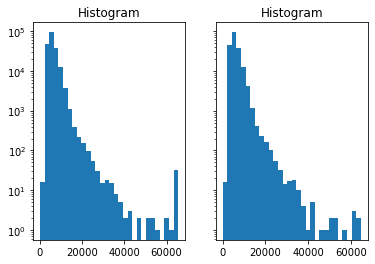

In [102]:
# Create the histogram plots
fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True)
b4_data.plot.hist(bins=30, log=True, ax=ax0)
b4_data_f.plot.hist(bins=30, log=True, ax=ax1);

## Reductions, element-wise calculations and broadcasting

In [105]:
herstappe = xr.open_rasterio(herstappe_file)
herstappe = herstappe.assign_coords(band=("band", ["red", "green", "blue"]))
herstappe_red = herstappe.sel(band="red")

### Reductions

The __reductions__ (aggregations) are provided as methods and can be applied along one or more of the data dimensions.

By default, the array is reduced over all dimensions, returning a single value as a DataArray:

In [108]:
herstappe_red.mean()

<xarray.DataArray ()>
array(0.27586532, dtype=float32)
Coordinates:
    band     <U5 'red'

In Numpy, the dimensions are called the __axis__:

In [110]:
herstappe_red.mean(axis=1)

<xarray.DataArray (y: 227)>
array([0.27257997, 0.2730302 , 0.27882323, 0.28289318, 0.28358892,
       0.2827528 , 0.28218287, 0.27802128, 0.27297595, 0.27357492,
       0.2750811 , 0.27421978, 0.27253968, 0.267533  , 0.26884004,
       0.26667392, 0.26950392, 0.27182943, 0.27148938, 0.27283612,
       0.2725464 , 0.27282214, 0.2732914 , 0.2809407 , 0.28457773,
       0.28962082, 0.29109505, 0.2883283 , 0.28721252, 0.2862478 ,
       0.28497875, 0.27839935, 0.27497035, 0.27145863, 0.27309564,
       0.2773652 , 0.2777612 , 0.27870917, 0.27950057, 0.28156993,
       0.28009897, 0.2784961 , 0.28004864, 0.28016555, 0.2799614 ,
       0.28029698, 0.27859282, 0.27868232, 0.27850223, 0.28422594,
       0.2747545 , 0.27626175, 0.2782226 , 0.27482104, 0.2757511 ,
       0.27877182, 0.27805147, 0.27441725, 0.27426678, 0.2760285 ,
       0.2784206 , 0.27596644, 0.27611804, 0.2747377 , 0.2743188 ,
       0.2724491 , 0.2672086 , 0.26089823, 0.2578473 , 0.2546292 ,
       0.2492981 , 0.2499944 , 0.24945639, 0.2477114 , 0.25369686,
       0.2589916 , 0.2613322 , 0.26193288, 0.2671068 , 0.26986575,
       0.2739463 , 0.27676624, 0.27886856, 0.27532104, 0.275915  ,
       0.2746516 , 0.27479023, 0.2731057 , 0.27007213, 0.27255148,
       0.27285233, 0.26989484, 0.27013814, 0.2779396 , 0.27601507,
       0.27753636, 0.28057772, 0.2804737 , 0.28125224, 0.28297094,
...
       0.28391612, 0.28284732, 0.28177014, 0.28556767, 0.28089765,
       0.27344462, 0.27452073, 0.27802572, 0.2784575 , 0.28234118,
       0.2862209 , 0.290736  , 0.28936243, 0.2865095 , 0.28146195,
       0.28202295, 0.27974552, 0.27544856, 0.26893288, 0.26566273,
       0.2634905 , 0.2642114 , 0.27001736, 0.27205536, 0.2740498 ,
       0.28036857, 0.28384957, 0.2881885 , 0.2849536 , 0.28080592,
       0.27967507, 0.27667618, 0.2811029 , 0.27860457, 0.27888033,
       0.28203857, 0.28413534, 0.28942174, 0.2876454 , 0.28944966,
       0.2917763 , 0.28778747, 0.2874709 , 0.28477237, 0.27712303,
       0.27817672, 0.27468625, 0.2745794 , 0.27197203, 0.2717567 ,
       0.2735403 , 0.276094  , 0.274481  , 0.27807832, 0.2762254 ,
       0.2777869 , 0.27896476, 0.28867394, 0.29002458, 0.29157272,
       0.29093847, 0.2968149 , 0.29821423, 0.29791832, 0.29627797,
       0.2927662 , 0.28936523, 0.28149047, 0.2772953 , 0.27569237,
       0.27091107, 0.2602349 , 0.26218903, 0.25784284, 0.25383276,
       0.24703188, 0.24943289, 0.2481499 , 0.24555984, 0.25293064,
       0.25616834, 0.25984564, 0.2595867 , 0.2658294 , 0.25919014,
       0.25744295, 0.25550896, 0.2572332 , 0.25469968, 0.26596195,
       0.2730632 , 0.2658529 , 0.2639066 , 0.26685235, 0.27544463,
       0.28415158, 0.28765494], dtype=float32)
Coordinates:
    band     <U5 'red'
  * y        (y) float64 6.578e+06 6.577e+06 6.577e+06 ... 6.569e+06 6.568e+06

But we have __dimensions with labels__, so rather than performing reductions on axes (as in Numpy), we can perform them on __dimensions__. This turns out to be convenient and declarative:

In [111]:
herstappe_red.mean(dim="x").dims

('y',)

Calculate the mean values for each of the bands separately:

In [115]:
herstappe.mean(dim=["x", "y"])  # read as: 'take the mean over the dimensions x and y combined'

<xarray.DataArray (band: 3)>
array([0.27586532, 0.28978536, 0.29871756], dtype=float32)
Coordinates:
  * band     (band) <U5 'red' 'green' 'blue'

Or some quantiles:

In [116]:
herstappe.quantile([0.1, 0.5, 0.9], dim=["x", "y"])

<xarray.DataArray (quantile: 3, band: 3)>
array([[0.17125   , 0.23675001, 0.25999999],
       [0.2615    , 0.28600001, 0.29475001],
       [0.39274999, 0.34474999, 0.34024999]])
Coordinates:
  * band      (band) <U5 'red' 'green' 'blue'
  * quantile  (quantile) float64 0.1 0.5 0.9

### Element-wise computations

The __for each element__ is crucial for NumPy and Xarray. The typical answer in programming would be a `for`-loop, but Numpy is optimized to do these calculations __element-wise__ (i.e. for all elements together):

In [117]:
dummy = np.arange(1, 10)
dummy

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [118]:
dummy*10

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

Instead of:

In [119]:
[el*20 for el in dummy]

[20, 40, 60, 80, 100, 120, 140, 160, 180]

Numpy provides most of the familiar arithmetic operators to apply on an element-by-element basis:

In [120]:
np.exp(dummy), np.sin(dummy), dummy**2, np.log(dummy)

(array([2.71828183e+00, 7.38905610e+00, 2.00855369e+01, 5.45981500e+01,
        1.48413159e+02, 4.03428793e+02, 1.09663316e+03, 2.98095799e+03,
        8.10308393e+03]),
 array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427,
        -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849]),
 array([ 1,  4,  9, 16, 25, 36, 49, 64, 81]),
 array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
        1.79175947, 1.94591015, 2.07944154, 2.19722458]))

Xarray works seamlessly with those arithmetic operators and numpy array functions.

In [121]:
herstappe_red * 10.

<xarray.DataArray (y: 227, x: 447)>
array([[3.375    , 2.1950002, 1.7675   , ..., 1.67     , 1.7624999,
        2.4850001],
       [3.62     , 2.9524999, 2.22     , ..., 1.97     , 2.1275   ,
        2.7125   ],
       [3.0774999, 2.6425002, 2.5874999, ..., 2.7200003, 2.8975   ,
        2.7425   ],
       ...,
       [3.9175   , 3.8825   , 4.335    , ..., 3.815    , 3.1349998,
        2.055    ],
       [3.8625   , 4.0474997, 4.2124996, ..., 3.9724998, 3.875    ,
        3.2350001],
       [3.9050002, 4.0375   , 4.1775   , ..., 3.8600001, 3.88     ,
        3.8725   ]], dtype=float32)
Coordinates:
    band     <U5 'red'
  * y        (y) float64 6.578e+06 6.577e+06 6.577e+06 ... 6.569e+06 6.568e+06
  * x        (x) float64 5.935e+05 5.935e+05 5.936e+05 ... 6.113e+05 6.114e+05

In [122]:
np.log(herstappe_red)

<xarray.DataArray (y: 227, x: 447)>
array([[-1.0861897 , -1.5164031 , -1.733019  , ..., -1.7897615 ,
        -1.7358519 , -1.3923124 ],
       [-1.0161111 , -1.2199328 , -1.5050778 , ..., -1.6245515 ,
        -1.5476375 , -1.3047143 ],
       [-1.1784675 , -1.3308597 , -1.351893  , ..., -1.3019532 ,
        -1.2387367 , -1.2937152 ],
       ...,
       [-0.9371314 , -0.94610584, -0.8358635 , ..., -0.96364444,
        -1.159956  , -1.5823092 ],
       [-0.95127046, -0.9044857 , -0.86452883, ..., -0.9231895 ,
        -0.9480395 , -1.1285561 ],
       [-0.9403273 , -0.9069594 , -0.8728721 , ..., -0.9519179 ,
        -0.9467499 , -0.9486848 ]], dtype=float32)
Coordinates:
    band     <U5 'red'
  * y        (y) float64 6.578e+06 6.577e+06 6.577e+06 ... 6.569e+06 6.568e+06
  * x        (x) float64 5.935e+05 5.935e+05 5.936e+05 ... 6.113e+05 6.114e+05
Attributes:
    transform:               (40.07813983073409, 0.0, 593476.1968631798, 0.0,...
    crs:                     +init=epsg:3857
    res:                     (40.07813983073409, 40.1126034998577)
    is_tiled:                0
    nodatavals:              (nan, nan, nan)
    scales:                  (1.0, 1.0, 1.0)
    offsets:                 (0.0, 0.0, 0.0)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

We can combine multiple xarray arrays in arithemetic operations:

In [123]:
herstappe.sel(band="red") - herstappe.sel(band="green")

<xarray.DataArray (y: 227, x: 447)>
array([[ 0.02650002, -0.03299999, -0.06224999, ..., -0.05825001,
        -0.05525   ,  0.00075001],
       [ 0.01349998, -0.01675001, -0.03525001, ..., -0.03925   ,
        -0.04200001, -0.01874998],
       [-0.00600001, -0.01349998, -0.01899999, ..., -0.01525   ,
        -0.01499999,  0.0045    ],
       ...,
       [ 0.04975   ,  0.0465    ,  0.06774998, ...,  0.04425001,
         0.00424999, -0.04525   ],
       [ 0.044     ,  0.05824998,  0.06449997, ...,  0.05574998,
         0.04949999,  0.00875002],
       [ 0.05000001,  0.053     ,  0.05849999, ...,  0.04975   ,
         0.04700002,  0.03825   ]], dtype=float32)
Coordinates:
  * y        (y) float64 6.578e+06 6.577e+06 6.577e+06 ... 6.569e+06 6.568e+06
  * x        (x) float64 5.935e+05 5.935e+05 5.936e+05 ... 6.113e+05 6.114e+05

### Broadcasting

When we combine arrays with different shapes during arithmetic operations, NumPy and Xarray apply a set of __broadcoasting__ rules and the smaller array is _broadcast_ across the larger array so that they have compatible shapes. 

Perfoming an operation on arrays with different coordinates will result in automatic broadcasting:

In [125]:
herstappe.x.shape, herstappe_red.shape

((447,), (227, 447))

In [126]:
herstappe_red + herstappe.x  # Note, this calculaton does not make much sense, but illustrates broadcasting

<xarray.DataArray (y: 227, x: 447)>
array([[593496.5734331 , 593536.53357293, 593576.56896276, ...,
        611291.09701794, 611331.18440777, 611371.33479761],
       [593496.59793308, 593536.60932292, 593576.61421276, ...,
        611291.12701794, 611331.22090777, 611371.35754761],
       [593496.54368308, 593536.57832294, 593576.65096275, ...,
        611291.20201796, 611331.29790778, 611371.3605476 ],
       ...,
       [593496.6276831 , 593536.70232292, 593576.82571275, ...,
        611291.31151795, 611331.32165776, 611371.29179761],
       [593496.62218308, 593536.71882292, 593576.81346274, ...,
        611291.32726794, 611331.39565776, 611371.40979761],
       [593496.6264331 , 593536.71782293, 593576.80996276, ...,
        611291.31601795, 611331.39615778, 611371.47354761]])
Coordinates:
    band     <U5 'red'
  * y        (y) float64 6.578e+06 6.577e+06 6.577e+06 ... 6.569e+06 6.568e+06
  * x        (x) float64 5.935e+05 5.935e+05 5.936e+05 ... 6.113e+05 6.114e+05

<div class="alert alert-info" style="font-size:120%">

**REMEMBER**: <br>

The combination of element-wise calculations, efficient reductions and broadcasting provides NumPy and Xarray a lot of power. In general, it is a good advice to __avoid for loops__ when working with arrays.

</div>

### Let's practice!

<div class="alert alert-success">

**EXERCISE**:

The data set `./data/herstappe/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff` (assign to variable `herstappe_data`) has values ranging in between 0.11325, 0.8575. To improve the quality of the visualization, stretch __each of the layers individually__ to the values to the range 0. to 1. with a linear transformation: 
    
$$z_i=\frac{x_i-\min(x)}{\max(x)-\min(x)}$$

Make a plot of the end result and compare with a plot of the original data. 

<details><summary>Hints</summary>

* We ask to do it *"for each of the bands"*, but you don't need to do it separately for each band! Using broadcasting and element-wise operations, we can do this in one go.
* First calculate the minimum and maximum value for the bands (i.e. reducing over the other (x, y) dimensions). This should result in an 1D array of length 3.
* With those min/max arrays, you can add and subtract those from the original `herstappe_data` array to obtain the scaled data.

</details>    
    
</div>

In [135]:
herstappe_data = xr.open_rasterio("./data/herstappe/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff")

In [136]:
# Calculate the min and max for each channel
h_min = herstappe_data.min(dim=["x", "y"])
h_max = herstappe_data.max(dim=["x", "y"])

In [137]:
# Rescale the data
herstappe_rescaled = ((herstappe_data - h_min)/(h_max - h_min))

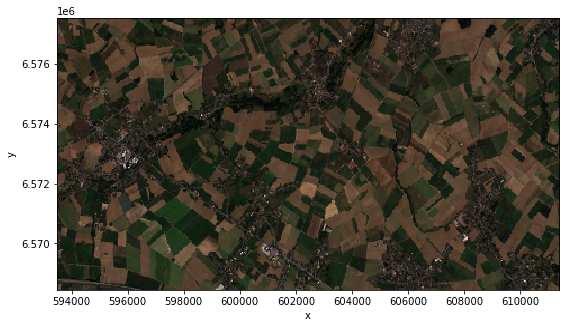

In [138]:
# Make a plot
herstappe_rescaled.plot.imshow(figsize=(9, 5))

<div class="alert alert-success">

**EXERCISE**:

The true color data set for Ghent `./data/gent/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff` contains 3 bands. Plotting with the `imshow` function can plot 3-D (RGB) data sets, but when running `gent.plot.imshow()`, we get an error. This is because matplotlib expects data in the range of [0..1] for floats or [0..255] for integers. 
    
The data type of this specific array `gent` is 16bit unsigned integer. Detailed info on data types is out of scope of this course, but remember that using 16bit unsigned integer, it can contain `2**16` different (all positive) integer values:

```
>>> 2**16
65536
```

In this excercise, we will convert the data to floats so we can plot it as RGB values.

- Read the data file and assign to a variable `gent`.
- Try to plot it with the `imshow()` method.
- Convert the array to a float array and call it `gent_f`.
- Convert the max value of 65536 to np.nan (as we have done before).
- Now divide the array by 65536 to get our data in a [0-1] range.
- Plot the result with the `imshow()` method.

<details><summary>Hints</summary>

* To convert the data type of an array, you can use the `astype()` method.
* Masking out part of the data based on a condition can be done with the `where()` method.

</details>    
    
</div>

In [139]:
gent = xr.open_rasterio("./data/gent/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff")
gent

<xarray.DataArray (band: 3, y: 317, x: 625)>
[594375 values with dtype=uint16]
Coordinates:
  * band     (band) int64 1 2 3
  * y        (y) float64 6.639e+06 6.639e+06 6.639e+06 ... 6.621e+06 6.621e+06
  * x        (x) float64 3.925e+05 3.926e+05 3.926e+05 ... 4.282e+05 4.283e+05
Attributes:
    transform:               (57.32777121388223, 0.0, 392465.9217302375, 0.0,...
    crs:                     +init=epsg:3857
    res:                     (57.32777121388223, 57.44833434997156)
    is_tiled:                0
    nodatavals:              (nan, nan, nan)
    scales:                  (1.0, 1.0, 1.0)
    offsets:                 (0.0, 0.0, 0.0)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


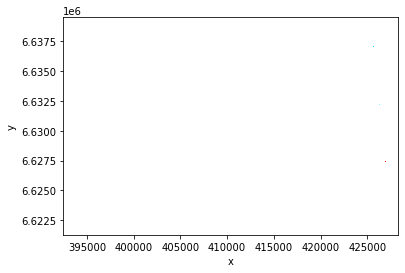

In [140]:
gent.plot.imshow()

In [141]:
# Convert to float and make 65535 equal to Nan
gent_f = gent.astype(float)
gent_f = gent_f.where(gent != 65535)

In [142]:
# Divide by the maximum of the int16 range to get [0-1] data
gent_f = gent_f / 2**16

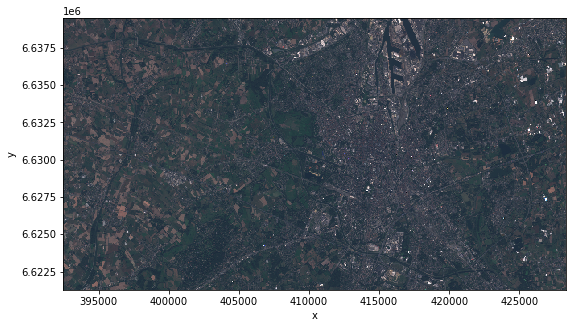

In [143]:
# Make a RGB plot
gent_f.plot.imshow(figsize=(9, 5))

<div class="alert alert-success">

**EXERCISE**:

Next, plot a greyscale version of the data as well. Instead of using a custom function just rely on the sum of the 3 bands as a quick proxy.
    
<details><summary>Hints</summary>

* A greyscale image requires a greyscale `cmap`, check the available names in [the documentation online](https://matplotlib.org/tutorials/colors/colormaps.html)
* Xarray provides the common aggregation functions as methods to a DataArray, e.g. `my_array.sum(...)`
* To do a reduction over a given dimension, use the `dim`-ension name as parameter of the method.

</details>    
    
</div>

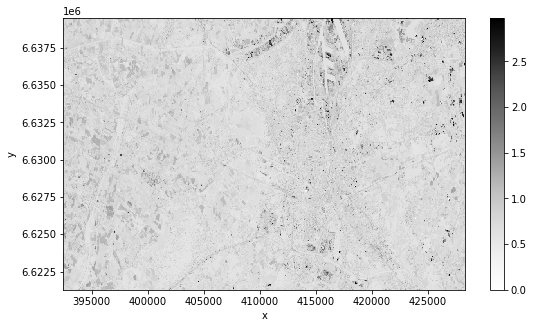

In [144]:
# Make a Grey scale plot
gent_f.sum(dim="band").plot.imshow(cmap="Greys", figsize=(9, 5))

<div class="alert alert-success">

**EXERCISE**:

The data sets `./data/gent/raster/2020-09-17_Sentinel_2_L1C_B04.tiff` and `./data/gent/raster/2020-09-17_Sentinel_2_L1C_B08.tiff` contain respectively the 4th and the 8th band of a sentinel satellite image. To derive the [Normalized Difference Vegetation Index) (NDVI)](https://nl.wikipedia.org/wiki/Normalized_Difference_Vegetation_Index), the two bands need to be combined as follows:
    
$$\frac{band_8 - band_4}{band_8 + band_4} $$
    
Process the images and create a plot of the NDVI:
    
- Read both data sets and store them in resp. `b4_data` and `b8_data`. 
- Transform the data range of each of the layers to the range .0 - 1.
- Calculate the NDVI
- Plot the NDVI and select an appropriate colormap.

<details><summary>Hints</summary>

* For more specific adjustments to the colormap, have a check on the [Matplotlib documentation on colormap normalization](https://matplotlib.org/3.3.2/tutorials/colors/colormapnorms.html)

</details>   
           
</div>

In [145]:
b4_data = xr.open_rasterio("./data/gent/raster/2020-09-17_Sentinel_2_L1C_B04.tiff").sel(band=1)
b8_data = xr.open_rasterio("./data/gent/raster/2020-09-17_Sentinel_2_L1C_B08.tiff").sel(band=1)

In [146]:
# Rescale the data to 0-1
b4_data = (b4_data - b4_data.min())/(b4_data.max() - b4_data.min())
b8_data = (b8_data - b8_data.min())/(b8_data.max() - b8_data.min())

In [147]:
# Calculate the ndvi
ndvi = (b8_data - b4_data)/(b8_data + b4_data)

Using a Matplotlib norm to adjust colormap influence on image https://matplotlib.org/api/_as_gen/matplotlib.colors.TwoSlopeNorm.html

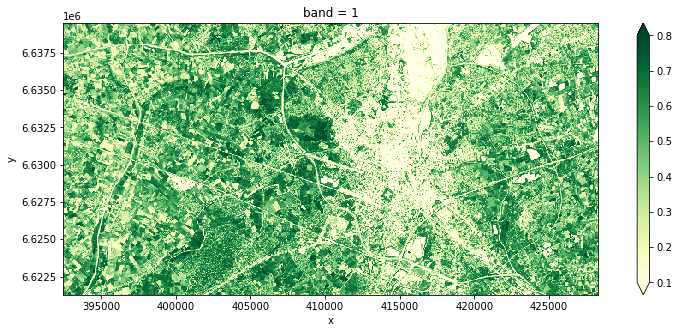

In [148]:
# A Sequential colormap `YlGn` with a normalization on the color limits
import matplotlib.colors as mcolors
div_norm = mcolors.Normalize(0.1, 0.8)
fig, ax = plt.subplots(figsize=(14, 5))
ll = ndvi.plot.imshow(ax=ax, cmap="YlGn", norm=div_norm)
ax.set_aspect("equal")

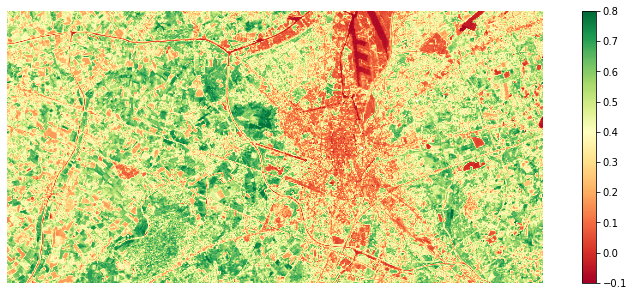

In [149]:
# A Diverging colormap `RdYlGn` with a normalization on the color limits in two directions of the central point:
div_norm = mcolors.TwoSlopeNorm(vmin=-0.1, vcenter=0.4, vmax=0.8)
fig, ax = plt.subplots(figsize=(14, 5))
ll = ax.imshow(ndvi.values, cmap="RdYlGn", norm=div_norm)
fig.colorbar(ll);
ax.set_axis_off();

<div class="alert alert-success">

**(ADVANCED) EXERCISE**:
    
You want to reclassify the values of the 4th band data to a fixed set of classes:
    
* x < 0.05 need to be 0
* 0.05 < x < 0.1 need to be 1
* x > 0.1 need to be 2
       
Use the data set `./data/gent/raster/2020-09-17_Sentinel_2_L1C_B04.tiff` (assign data to variable `b4_data`):
    
* Read the data set and exclude the single-value dimension to end up with a 2D array. 
* Convert to float data type. and normalize the values to the range `[0., 1.]`.

To reclassify the values, we can use the `np.digitize` function. This function return the indices of the bins to which each value in input array belongs. As such, it can be used to select and manipulate values containing to a specific bin.
    
* Apply the `np.digitize` function to `b4_data` using the `xr.apply_ufunc()` function. The first argument is the function to apply, the following arguments are the arguments that would be passed to the function (`np.digitize`). Call the result `b4_data_classified`.
* Make a image plot of the reclassified variable `b4_data_classified`.
    
</div>

In [153]:
b4_data = xr.open_rasterio("./data/gent/raster/2020-09-17_Sentinel_2_L1C_B04.tiff")

In [70]:
# Convert to 2D float array 
b4_data = b4_data.sel(band=1).astype(float)

In [150]:
# Rescale the data
b4_data = (b4_data - b4_data.min())/(b4_data.max() - b4_data.min())

In [151]:
# Classify the array into 3 bins
b4_data_classified = xr.apply_ufunc(np.digitize, b4_data, [0.05, 0.1])

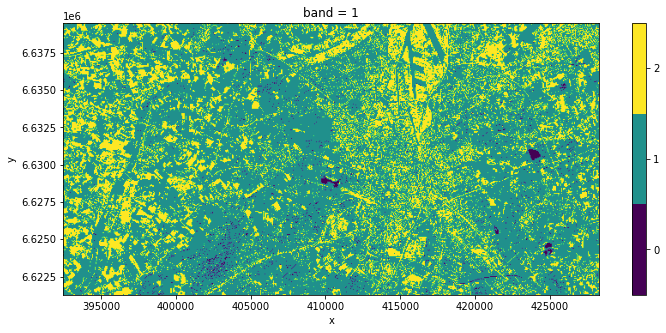

In [152]:
# Create an image plot
fig, ax = plt.subplots(figsize=(12, 5))
img = b4_data_classified.plot.imshow(ax=ax, add_colorbar=False, interpolation="antialiased")
fig.colorbar(img, values=[0, 1, 2], ticks=[0, 1, 2])